In [3]:
from collections import Counter

# EDA
import matplotlib.pyplot as plt
import numpy as np

# data manipulation
import pandas as pd
import seaborn as sns
from imblearn.combine import SMOTETomek
from scipy import stats

# feature selection
from sklearn.ensemble import RandomForestClassifier

# algorithms
from sklearn.linear_model import LogisticRegression

# model evaluation
from sklearn.metrics import (
    accuracy_score,
    brier_score_loss,
    classification_report,
    cohen_kappa_score,
    f1_score,
    precision_score,
    recall_score,
    roc_auc_score,
)

# machine learning
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv("credit_sample.csv")

In [5]:
df.head()

,loan_status,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,0,0.015625,0.002751,0.121951,0.014493,0.321348,0.120482,0.000000,0,0,...,0,0,1,0,0,0,0,0,1,0
1,1,0.078125,0.002751,0.024390,0.144928,0.418539,0.686747,0.035714,1,0,...,0,0,0,1,0,0,0,0,1,0
2,1,0.046875,0.030209,0.097561,1.000000,0.551124,0.638554,0.000000,0,0,...,0,0,0,1,0,0,0,0,1,0
3,1,0.062500,0.024757,0.195122,1.000000,0.497191,0.662651,0.071429,0,0,...,0,0,0,1,0,0,0,0,0,1
4,1,0.015625,0.002898,0.048780,0.057971,0.096629,0.301205,0.000000,0,0,...,1,1,0,0,0,0,0,0,1,0


In [6]:
df.shape

(29459, 27)

In [7]:
df.dtypes

loan_status                         int64
person_age                        float64
person_income                     float64
person_emp_length                 float64
loan_amnt                         float64
loan_int_rate                     float64
loan_percent_income               float64
cb_person_cred_hist_length        float64
person_home_ownership_MORTGAGE      int64
person_home_ownership_OTHER         int64
person_home_ownership_OWN           int64
person_home_ownership_RENT          int64
loan_intent_DEBTCONSOLIDATION       int64
loan_intent_EDUCATION               int64
loan_intent_HOMEIMPROVEMENT         int64
loan_intent_MEDICAL                 int64
loan_intent_PERSONAL                int64
loan_intent_VENTURE                 int64
loan_grade_A                        int64
loan_grade_B                        int64
loan_grade_C                        int64
loan_grade_D                        int64
loan_grade_E                        int64
loan_grade_F                      

In [8]:
df.loan_status.value_counts()

0    22996
1     6463
Name: loan_status, dtype: int64

Clearly, the data are highly imbalanced.

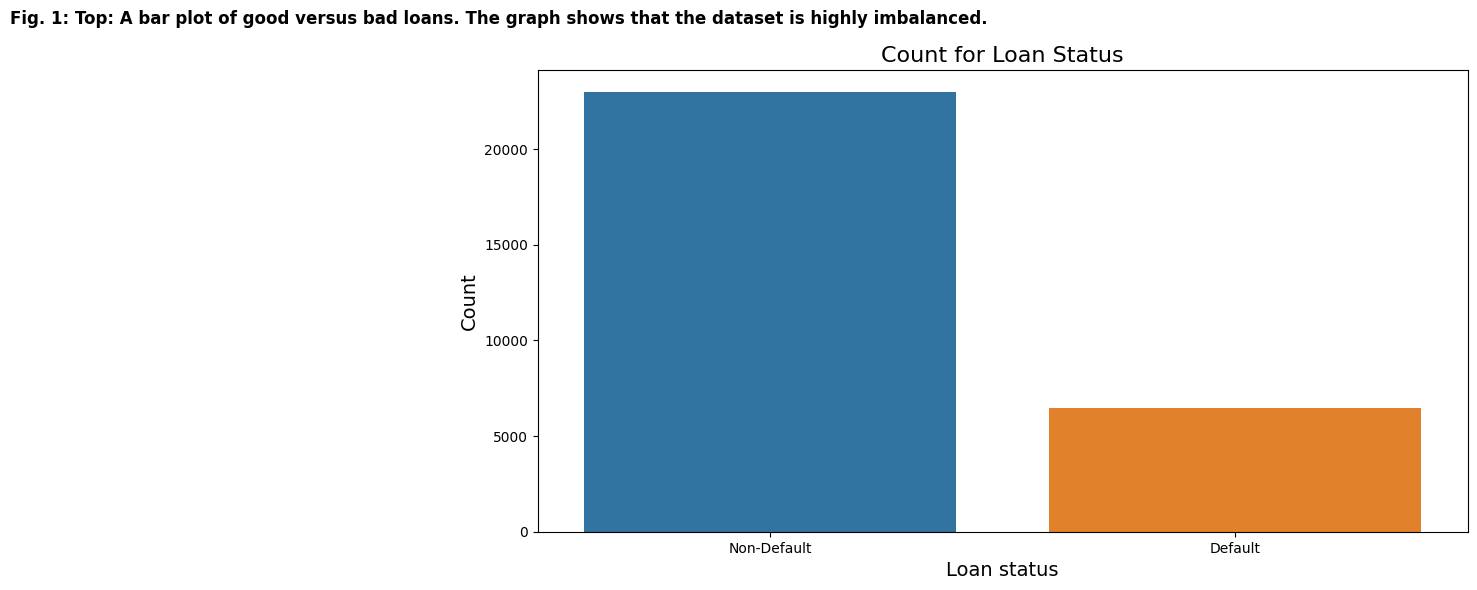

In [9]:
# plots count
ax = sns.countplot(x=df["loan_status"])

# sets the figure size in inches
ax.figure.set_size_inches(12, 6)

# set plot features
ax.set_title("Count for Loan Status", fontsize=16)
ax.set_ylabel("Count", fontsize=14)
ax.set_xlabel("Loan status", fontsize=14)

# set `xticks` labels
plt.xticks([0, 1], ["Non-Default", "Default"])

plt.suptitle(
    "Fig. 1: Top: A bar plot of good versus bad loans. The graph shows that the dataset is highly imbalanced.",
    fontweight="bold",
    horizontalalignment="right",
)

# displays plot
plt.show()

In [10]:
# separating the data set for easier analysis
df_default = df[df["loan_status"] == 1].copy()
df_non_default = df[df["loan_status"] == 0].copy()

# counts the number of defaults and non-defaults
total_default = df_default.shape[0]
total_non_default = df_non_default.shape[0]
total_loans = df.shape[0]

print("Number of default cases:", total_default)
print(
    "This is equivalent to {:.2f}% of the total loans".format(
        (total_default / total_loans) * 100
    )
)

print("\nNumber of non-defualt cases:", total_non_default)
print(
    "This is equivalent to {:.2f}% of the total loans".format(
        (total_non_default / total_loans) * 100
    )
)

Number of default cases: 6463
This is equivalent to 21.94% of the total loans

Number of non-defualt cases: 22996
This is equivalent to 78.06% of the total loans


In [11]:
# creates the X and y data sets
X = df.drop("loan_status", axis=1).values
y = df["loan_status"].values

# splits into training and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=2022, stratify=y
)

### **2.4 Balancing Data for Training**

Since we saw that the data was highly imbalanced, we performed oversampling with synthetic minority over-sampling technique (SMOTE) with the package below.

In [12]:
# counts the number of classes before oversampling
print("Before balancing:", Counter(y_train))

# defines the resampler
resampler = SMOTETomek(random_state=2022, n_jobs=-1)

# transforms the data set
X_balanced, y_balanced = resampler.fit_resample(X_train, y_train)

# counts the number of classes after oversampling
print("After balancing:", Counter(y_balanced))

Before balancing: Counter({0: 17247, 1: 4847})


/usr/local/lib/python3.10/dist-packages/imblearn/over_sampling/_smote/base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


After balancing: Counter({1: 16988, 0: 16988})


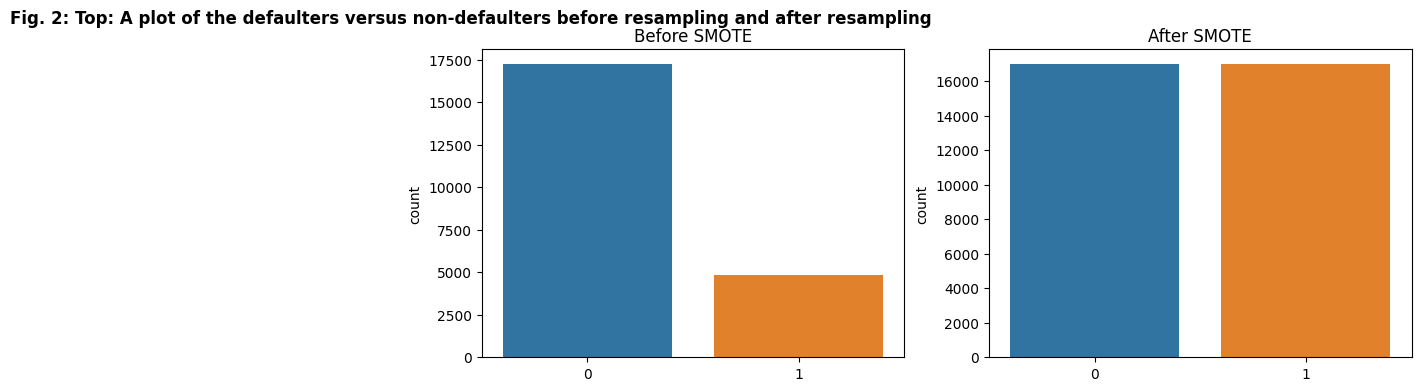

In [13]:
# plots before and after SMOTE
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.countplot(x=y_train)
plt.title("Before SMOTE")

plt.subplot(1, 2, 2)
sns.countplot(x=y_balanced)
plt.title("After SMOTE")

plt.suptitle(
    "Fig. 2: Top: A plot of the defaulters versus non-defaulters before resampling and after resampling",
    fontweight="bold",
    horizontalalignment="right",
)

plt.show()

In [14]:
print("Total records BEFORE:", X_train.shape[0])
print("Total records AFTER:", X_balanced.shape[0])
print("Difference =", X_train.shape[0] - X_balanced.shape[0])

Total records BEFORE: 22094
Total records AFTER: 33976
Difference = -11882


In [15]:
# Set the threshold for defaults
THRESHOLD = 0.50

In [16]:
# list of classifiers
classifiers = [
    LogisticRegression(max_iter=220, random_state=2022),
    RandomForestClassifier(random_state=2022),
]

The function below trains the models on a dataset and evaluates their performance on unseen data.

In [17]:
def calculate_model_metrics(model, X_test, y_test, model_probs, threshold):
    """
    Calculates Accuracy, F1-Score, PR AUC
    """
    # keeps probabilities for the positive outcome only
    probs = pd.DataFrame(model_probs[:, 1], columns=["prob"])

    # applies the threshold
    y_pred = probs["prob"].apply(lambda x: 1 if x > threshold else 0)

    # calculates f1-score
    f1 = f1_score(y_test, y_pred)

    # calculates accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # calculates kappa score
    kappa = cohen_kappa_score(y_test, y_pred)

    # calculates AUC
    auc_score = roc_auc_score(y_test, probs)

    # calculates the precision
    precision = precision_score(y_test, y_pred)

    # calculates the recall
    recall = recall_score(y_test, y_pred)

    return accuracy, kappa, f1, auc_score, precision, recall

In [18]:
def get_classifiers_performance(
    X_train, X_test, y_train, y_test, threshold, classifiers
):
    # creates empty data frame
    df_performance = pd.DataFrame()

    for clf in classifiers:
        print("Training " + type(clf).__name__ + "...")
        # fits the classifier to training data
        clf.fit(X_train, y_train)

        # predict the probabilities
        clf_probs = clf.predict_proba(X_test)

        # calculates model metrics
        (
            clf_accuracy,
            clf_kappa,
            clf_f1,
            clf_auc,
            clf_precision,
            clf_recall,
        ) = calculate_model_metrics(clf, X_test, y_test, clf_probs, threshold)

        # creates a dict
        clf_dict = {
            "model": [type(clf).__name__, "---"],
            "precision": [clf_precision, np.nan],
            "recall": [clf_recall, np.nan],
            "f1-Score": [clf_f1, np.nan],
            "ROC AUC": [clf_auc, np.nan],
            "accuracy": [clf_accuracy, np.nan],
            "cohen kappa": [clf_kappa, np.nan],
        }

        # concatenate Data Frames
        df_performance = pd.concat([df_performance, pd.DataFrame(clf_dict)])

    # resets Data Frame index
    df_performance = df_performance.reset_index()

    # drops index
    df_performance.drop("index", axis=1, inplace=True)

    # gets only the odd numbered rows
    rows_to_drop = np.arange(1, len(classifiers) * 2, 2)

    # drops unwanted rows that have no data
    df_performance.drop(rows_to_drop, inplace=True)

    # returns performance summary
    return df_performance

In [19]:
# calculates classifiers performance
df_performances = get_classifiers_performance(
    X_balanced, X_test, y_balanced, y_test, THRESHOLD, classifiers
)
# highlight max values for each column
df_performances.style.highlight_max()

Training LogisticRegression...
Training RandomForestClassifier...


,model,precision,recall,f1-Score,ROC AUC,accuracy,cohen kappa
0,LogisticRegression,0.556000,0.774134,0.647181,0.871817,0.814800,0.526163
2,RandomForestClassifier,0.897358,0.735767,0.808569,0.927707,0.923557,0.761395


In [20]:
# instantiates the classifiers
lr_clf = LogisticRegression(max_iter=220, random_state=2022)
rf_clf = RandomForestClassifier(random_state=2022)

# trains the classifiers
lr_clf.fit(X_balanced, y_balanced)
rf_clf.fit(X_balanced, y_balanced)

# store the predicted probabilities for class 1
y_pred_lr_prob = lr_clf.predict_proba(X_test)[:, 1]
y_pred_rf_prob = rf_clf.predict_proba(X_test)[:, 1]

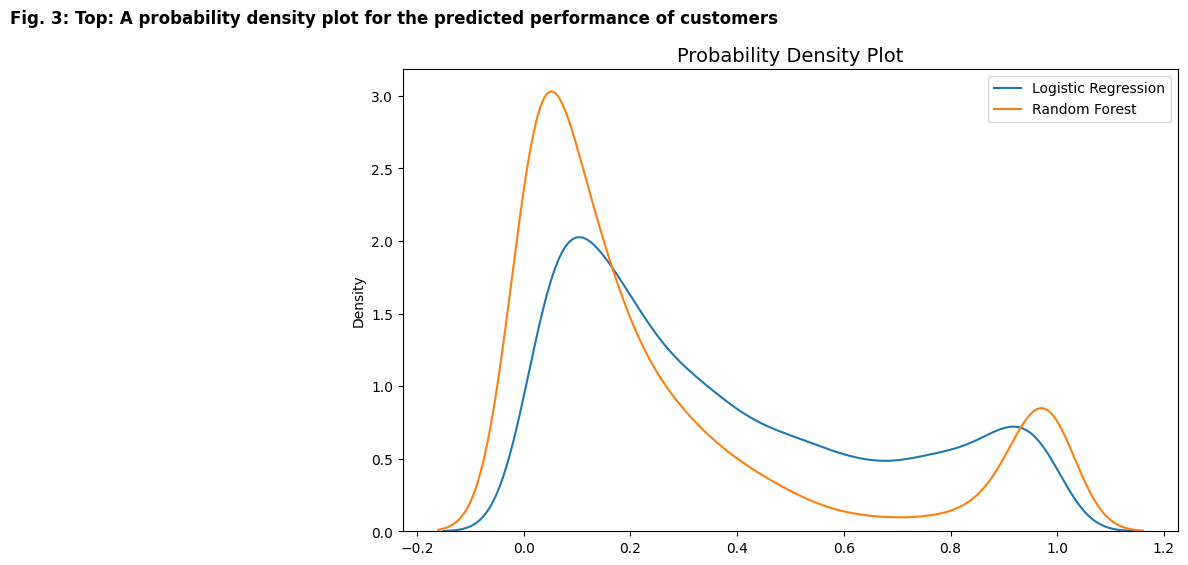

In [21]:
# sets plot size
plt.figure(figsize=(10, 6))

# plots
sns.kdeplot(y_pred_lr_prob, label="Logistic Regression")
sns.kdeplot(y_pred_rf_prob, label="Random Forest")

# sets the plot features
plt.title("Probability Density Plot", fontsize=14)
plt.legend()

plt.suptitle(
    "Fig. 3: Top: A probability density plot for the predicted performance of customers",
    fontweight="bold",
    horizontalalignment="right",
)

# displays the plot
plt.show()

<ipython-input-22-440808382655>:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


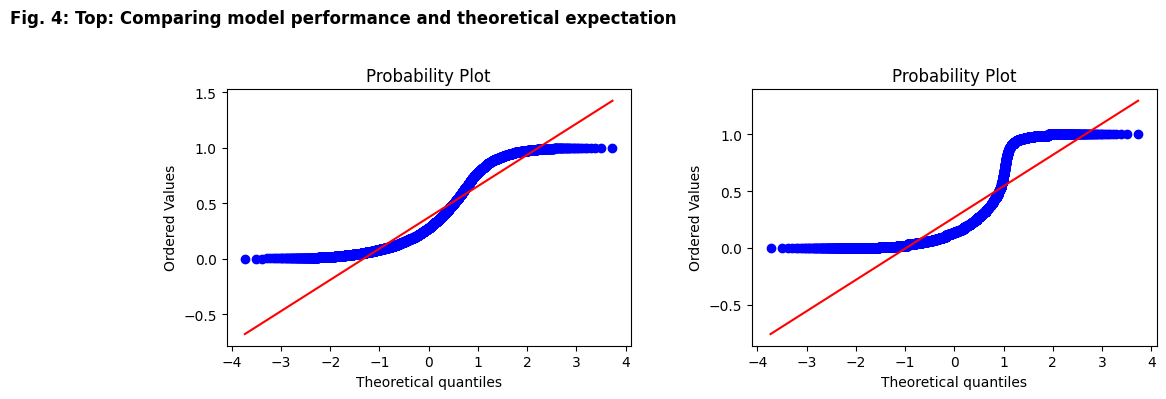

In [22]:
# set axes
fig, ax = plt.subplots()

# set fig size
ax.figure.set_size_inches(12, 8)

# plot probability - Logistic Regression
plt.subplot(2, 2, 1)
ax = stats.probplot(y_pred_lr_prob, plot=plt)

# plot probability - Random Forest
plt.subplot(2, 2, 2)
ax = stats.probplot(y_pred_rf_prob, plot=plt)

plt.subplots_adjust(wspace=0.3)
plt.subplots_adjust(hspace=0.4)

plt.suptitle(
    "Fig. 4: Top: Comparing model performance and theoretical expectation",
    fontweight="bold",
    horizontalalignment="right",
)

# displays the plot
plt.show()

The data seem to follow the theoretical distribution when we use the two models.

In [23]:
# calculates the Brier Score Loss
bsl_lr = brier_score_loss(y_test, y_pred_lr_prob, pos_label=1)
bsl_rf = brier_score_loss(y_test, y_pred_rf_prob, pos_label=1)

# prints the calculated Brier Score Loss for each algorithm probability
print(f"Brier Score Loss (Logistic Regression): {np.round(bsl_lr, 2)}")
print(f"Brier Score Loss (Random Forest): {np.round(bsl_rf, 2)}")

Brier Score Loss (Logistic Regression): 0.14
Brier Score Loss (Random Forest): 0.07


The smaller the value of the Brier score, the better.  The Brier score is made up of refinement loss and calibration loss. Clearly, we can see that random forest performs better since it give us a lower Brier score.

In [24]:
# makes predictions
y_pred_lr = lr_clf.predict(X_test)
y_pred_rf = rf_clf.predict(X_test)

print("Classification Report for " + type(lr_clf).__name__)
print(classification_report(y_test, y_pred_lr))

print("\nClassification Report for " + type(rf_clf).__name__)
print(classification_report(y_test, y_pred_rf))

Classification Report for LogisticRegression
              precision    recall  f1-score   support

           0       0.93      0.83      0.87      5749
           1       0.56      0.77      0.65      1616

    accuracy                           0.81      7365
   macro avg       0.74      0.80      0.76      7365
weighted avg       0.85      0.81      0.82      7365


Classification Report for RandomForestClassifier
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      5749
           1       0.90      0.74      0.81      1616

    accuracy                           0.92      7365
   macro avg       0.91      0.86      0.88      7365
weighted avg       0.92      0.92      0.92      7365



We observe that random forest performs better than logistic regression on unseen data. You are tasked to plot the receiver operation curve and the confusion matrix of the two models.

In the next step we will train deep learning models to estimate probability of default.

### **Deep Learning**

We start by importing `keras` classifier to run the model.

In [25]:
import logging

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

tf.get_logger().setLevel(logging.ERROR)

We then write a function with the model layers and activation functions at each layer

In [26]:
def model_function(dropout_rate, verbose=0):
    # Select a `keras` model, sequential function allows us to specify our neural network architecture
    model = keras.Sequential()
    # First Layer is dense implying that the features are connected to every single node in the first hidden layer
    model.add(Dense(128, kernel_initializer="normal", activation="relu", input_dim=26))
    model.add(Dense(64, kernel_initializer="normal", activation="relu"))
    model.add(Dense(8, kernel_initializer="normal", activation="relu"))
    # Drop out is added to ignore irrelevant neurons
    model.add(Dropout(dropout_rate))
    # We add sigmoid to classify the target
    model.add(Dense(1, activation="sigmoid"))
    # the loss function is binary cross entropy because the problem is a binary classification
    model.compile(loss="binary_crossentropy", optimizer="rmsprop")
    return model

The next cell defines the model parameters and hyperparameters, train the model and validate the model on test dataset.

In [ ]:
model = KerasClassifier(
    build_fn=model_function, dropout_rate=0.2, verbose=0, batch_size=50, epochs=100
)
model.fit(X_train, y_train)
y_predict_dl = model.predict(X_test)

<ipython-input-27-3de0a402f073>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(


We now evaluate the model using several metrics

In [ ]:
ROC_AUC_metric = roc_auc_score(y_test, pd.DataFrame(y_predict_dl.flatten()))
print("Deep Learning ROC AUC is {:.4f}".format(ROC_AUC_metric))

In [ ]:
print("\nClassification Report for deep learning model")
print(classification_report(y_test, y_predict_dl.flatten()))

In [ ]:
print("\nThe brier score is equal to ")
brier_score_loss(y_test, y_predict_dl.flatten(), pos_label=1)

We can observe that the model performance is comparable to random forest model without much data preparation or data balancing.